# Defining a Network in **PyTorch**

## Multi-layer Perceptron , MNIST

We'll train an MLP to classify an image from the
MNIST Database : http://yann.lecun.com/exdb/mnist/  hand written digit database.

Following are the steps :
1. Load and Visualize the data.
2. Define a neural network.
3. Train the model.
4. Evaluate the performance of our trained model on a test dataset.

**bold text**
**bold text**

In [16]:
# Importing Necesary Libraries
import torch
import numpy as np

## Load and Visualize the data.

Downloading data may take a few minutes and you should see progress as the data is loading.You may also choose to change the batch_size if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.


In [17]:
# The MNIST datasets are hosted on yann. Lecun.com that has moved under CloudFlare
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener (opener)

In [86]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler # To help the work of splitting the training data


# number of subprocesses to use for data loading
num_workers = 0  # (num_workers) to 0, which means data loading will be done in the main process (no additional worker processes).

# how many samples per batch to load
batch_size = 20

# Percentage of training set to use as validation
valid_size = 0.2

# Convert data to torch.FloatTensor
transform = transforms.ToTensor()    # (transform) to convert the data to torch.FloatTensor

# Choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Obtain training indices that will be used for validation
num_train = len(train_data) # It record how many training images there are, and it determine which in the training set will access to create both sets training and validation.
indices = list(range(num_train)) # It list out all the possible indices by grabbing the lenghth of the entire training set and these indices are going to the values that point to each of the 70,000 images in the training set.
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train)) # random images to include in the validation set, 20% of out training data.
train_idx, valid_idx = np.indices([split]), indices[:split] # split 80% training and 20% validation

# Define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Prepare data loaders
train_loader = DataLoader(train_data, batch_size=batch_size,   num_workers=num_workers)
valid_loader = DataLoader(train_data, batch_size=batch_size,  num_workers=num_workers)
test_loader =  DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)
# It creates data loaders for both the training and test datasets using the DataLoader class.

## Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

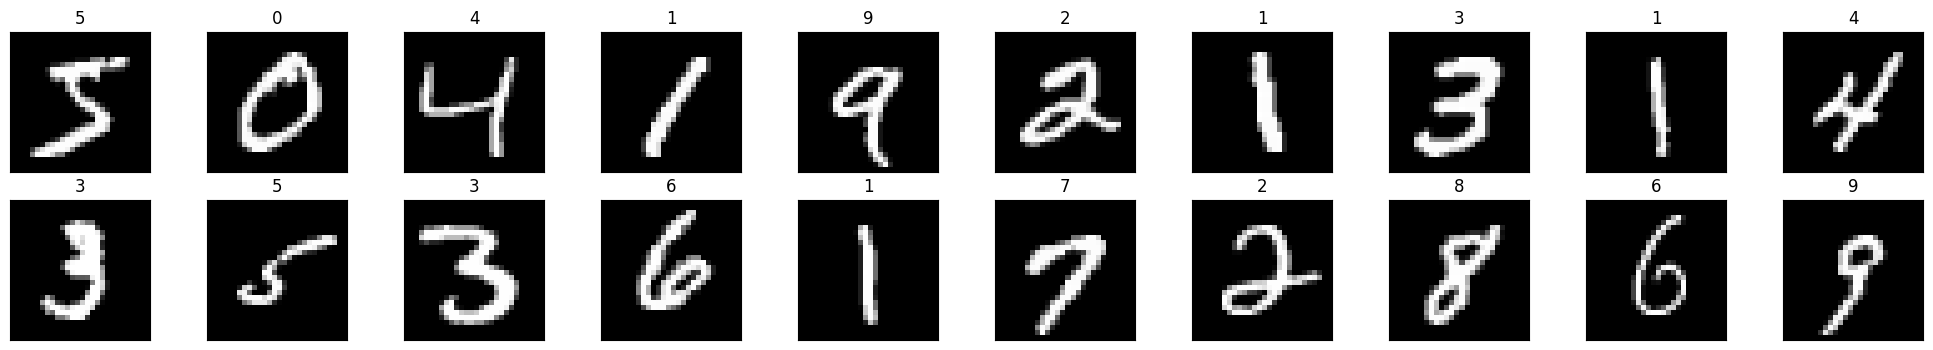

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')  # Set the cmap here
    ax.set_title(str(labels[idx].item()))  # Print out the correct label for each image


## View an image in More Detail

IndexError: ignored

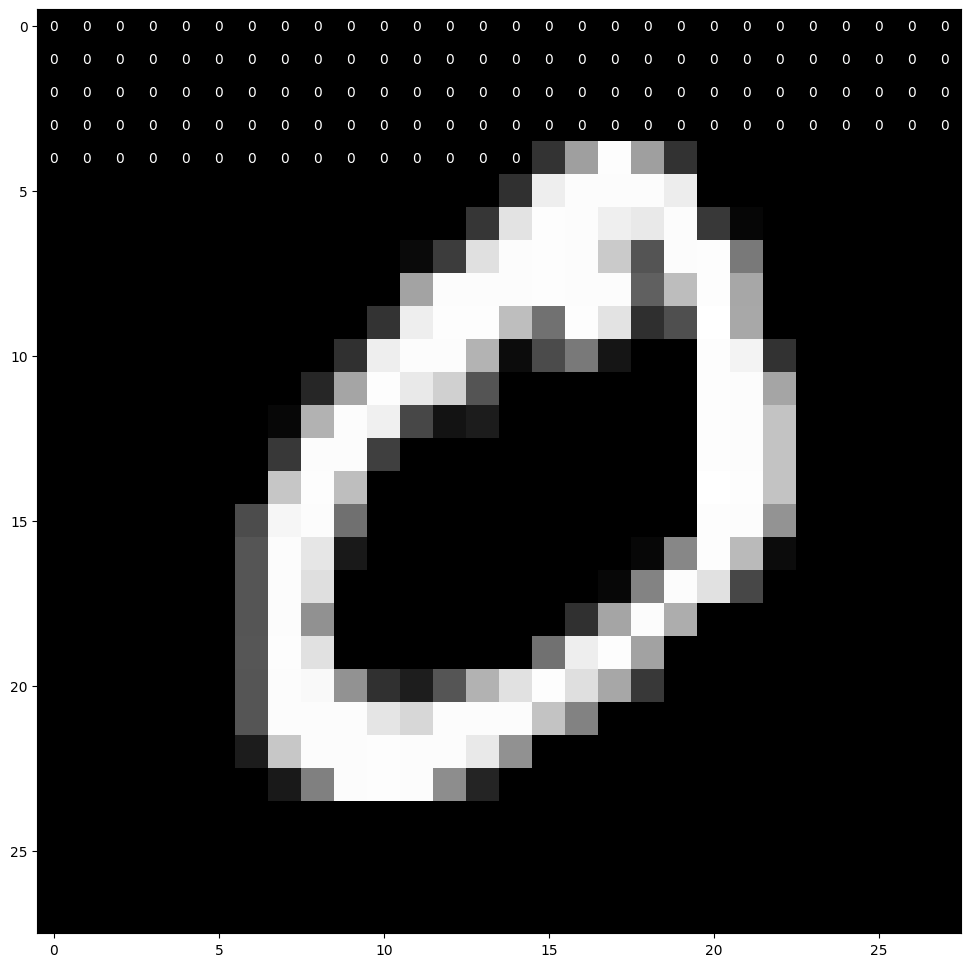

In [91]:
import numpy as np
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y,2]) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
        horizontalalignment='center',
        verticalalignment='center',
        color='white' if img[x][y]<thresh else 'black')

So the image should look like this(below) but it didn't, i recommend you to freely use this above code and i'm sure that you'll get the output like this.

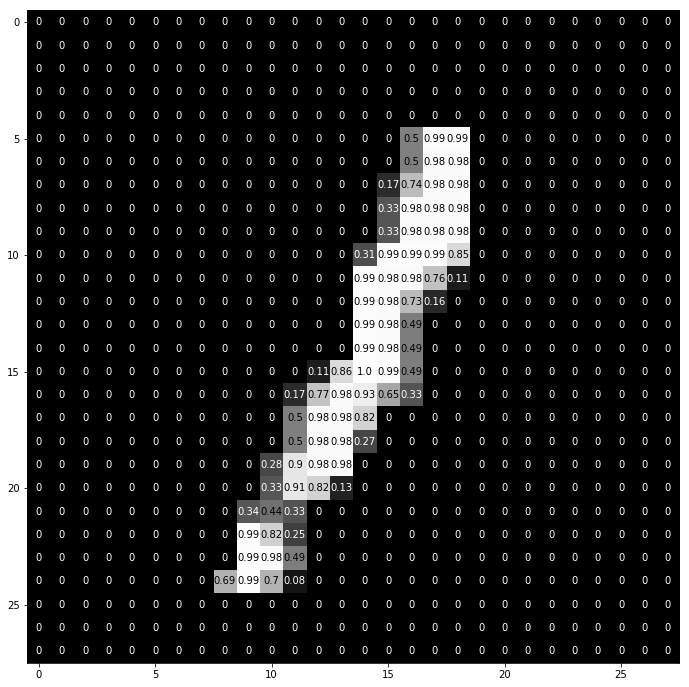

## Define the Network Architecture

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicstes the clasds scores for an input image. This particuklar example uses two hidden layers and dropout to avoid overfitting.

In [27]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):    # To define any neural network in PyToch you have to define and name any layers that have learned weight vakues in the init function.
        super(Net, self).__init__()

        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512

        # linear layer (784 or 28*28 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)   # In this case we define fully-connected layer

        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)

        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)

        # dropout layer (p=0.2)
        # dropout prevents overfitting of data

        self.dropout = nn.Dropout(0.2)


    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # I've made sure to flatten the input image X by using the view () function.
        # -1 i.e this function automatically fit all of the X values into this column shape.



      # Why i used ReLu function here bacause the output of every hidden layer so that those outputs are consistent postive values and finally return the transformed X.

        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # add dropout layer
        x = self.dropout(x)

        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))

        # add dropout layer
        x = self.dropout(x)

        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


# Specify Loss Function and Optimizer

It's recommened that you use cross-entropy loss for classification. If you look at the documentation(https://pytorch.org/docs/stable/nn.html#loss-functions), you can see that PyTorch's cross entropy function aplies a softmax function to the output layer and then calculates the log loss.


In [42]:
import torch
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (Stochastic Gradient Descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the Network

The steps for Training/learning form a batch of data are described in the comments below:

1. Clear the gradients of ll optimized variables.
2. Forward Pass: Compute predicted outputs by passing to the model.
3. Calculate the loss.
4. Backward Pass: Compute gradient of the loss with respect to model parameters.
5. Perform a single optimization step (parameter update).
6. Update average training loss.

The following loop trains for 50 epochs, take a look at how the values for the training loss decrease over time. we want it to decrease while also avoiding overfitting the training data.

In [108]:
# Number of epochs to train the model
n_epochs = 50 # Recommend training between 20-50 epochs.

# Initialize tracker for minimum validation loss
valid_loss_min = np.Inf  # Set initial "min" to infinity

for epoch in range(n_epochs):
    # Monitor training loss
    train_loss = 0.0
    valid_loss = 0.0

    #############
    # Train the model (batch loop)
    #############
    model.train()  # Set the model to training mode
    for data, target in train_loader:
      # Clear the gradients of all optimized variables
        optimizer.zero_grad()
      # Forward Pass: Compute predicted outputs by passing inputs to the model
        output = model(data)
      # calculate the loss
        loss = criterion(output, target)
      # Backward Pass: Compute gradient of the loss with respect to model paramters
        loss.backward()
      # Perform a single optimization step (parameter update)
        optimizer.step()
      # Update running training loss
        train_loss += loss.item()

    ############
    # Validate the model
    #############
    model.eval()  # Set the model to evaluation mode
    for data, target in valid_loader:
       # Clear the gradients of all optimized variables
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # Update running validation los
        valid_loss += loss.item()

    # Print training/validation statistics
    # Calculate average loss over an epoch
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch + 1,
        train_loss,
        valid_loss
    ))

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(
            valid_loss_min,
            valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss


Epoch: 1 	Training Loss: 0.032588 	Validation Loss: 0.019809
Validation loss decreased (inf --> 0.019809). Saving model ...
Epoch: 2 	Training Loss: 0.030692 	Validation Loss: 0.018946
Validation loss decreased (0.019809 --> 0.018946). Saving model ...
Epoch: 3 	Training Loss: 0.029608 	Validation Loss: 0.017126
Validation loss decreased (0.018946 --> 0.017126). Saving model ...
Epoch: 4 	Training Loss: 0.028742 	Validation Loss: 0.015793
Validation loss decreased (0.017126 --> 0.015793). Saving model ...
Epoch: 5 	Training Loss: 0.026843 	Validation Loss: 0.015374
Validation loss decreased (0.015793 --> 0.015374). Saving model ...
Epoch: 6 	Training Loss: 0.025191 	Validation Loss: 0.014758
Validation loss decreased (0.015374 --> 0.014758). Saving model ...
Epoch: 7 	Training Loss: 0.024508 	Validation Loss: 0.013534
Validation loss decreased (0.014758 --> 0.013534). Saving model ...
Epoch: 8 	Training Loss: 0.023494 	Validation Loss: 0.012036
Validation loss decreased (0.013534 --> 0

 **Load the model with the Lowest validation Loss**

In [95]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

**Test the Network**
Finally, we test our best model on previously unseen **test data** and evaluate it's performance. testing on unseend data is good way to check that our model genralizes well. It may also be useful to be granular in this anlysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

In [115]:
# Initialize list to monitor test loss and accuracy
test_loss = 0.0
class_correct = [0.0 for i in range(10)]
class_total = [0.0 for i in range(10)]

model.eval()  # Set the model to evaluation mode

for data, target in valid_loader:
    # Clear the gradients of all optimized variables
    output = model(data)

    # Update the loss
    test_loss += loss.item() * data.size(0)

    # Convert output probabilities to predicted class
    pred = torch.max(output, 1)

    # Compare predictions to true label
    correct = (pred[1] == target.data).squeeze()



    # Calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# Calculate and print avg test loss
test_loss = test_loss / len(test_loader.dataset)
print('Test Loss: {:6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i], int(np.sum(class_correct[i])), int(np.sum(class_total[i]))))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total), int(np.sum(class_correct)), int(np.sum(class_total))))


Test Loss: 0.000601

Test Accuracy of     0: 100% (5923/5923)
Test Accuracy of     1: 99% (6741/6742)
Test Accuracy of     2: 100% (5958/5958)
Test Accuracy of     3: 100% (6131/6131)
Test Accuracy of     4: 100% (5842/5842)
Test Accuracy of     5: 100% (5421/5421)
Test Accuracy of     6: 100% (5918/5918)
Test Accuracy of     7: 100% (6265/6265)
Test Accuracy of     8: 100% (5851/5851)
Test Accuracy of     9: 99% (5948/5949)

Test Accuracy (Overall): 99% (59998/60000)


**Visualize Sample Test Results**
This cell dislpays test images and their labels in this format : **predicted (ground-truth). The text will be green for accuartely classified examples and red for incorrect predictions.**

RuntimeError: ignored

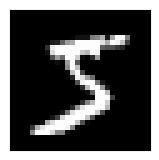

In [116]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Get sample outputs
output = model(images)
# Convert output probabilities to predicted class
preds = torch.max(output, 1)
# Prep images for display
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')  # Set the cmap here
    ax.set_title("{} ({})". format(str(preds[idx].item()), str(labels[idx].item())),
                 color= ("green" if preds[idx]== labels[idx] else "red"))
